<a href="https://colab.research.google.com/github/dellaanima/Aiffel_Repository/blob/master/Quest01/Quest01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Aiffel/Data/train.csv')

# 훈련 데이터와 테스트 데이터로 분리
train, test = train_test_split(data, test_size=0.2, random_state=42)

# 결과 확인
print("Train 데이터 - Shape:", train.shape)
print("Test 데이터 - Shape:", test.shape)


Train 데이터 - Shape: (8708, 12)
Test 데이터 - Shape: (2178, 12)


In [ ]:
#결측치 확인 -> 없음
print(data.isnull().sum().sort_values(ascending = False))


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# feature 값들 확인
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


# Data Preprocessing

## "datetime" Column Preporcessing

datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하라고 문항에 나와있었으나, 분, 초는 전부 00 값이어서 제외 함.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime


train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek


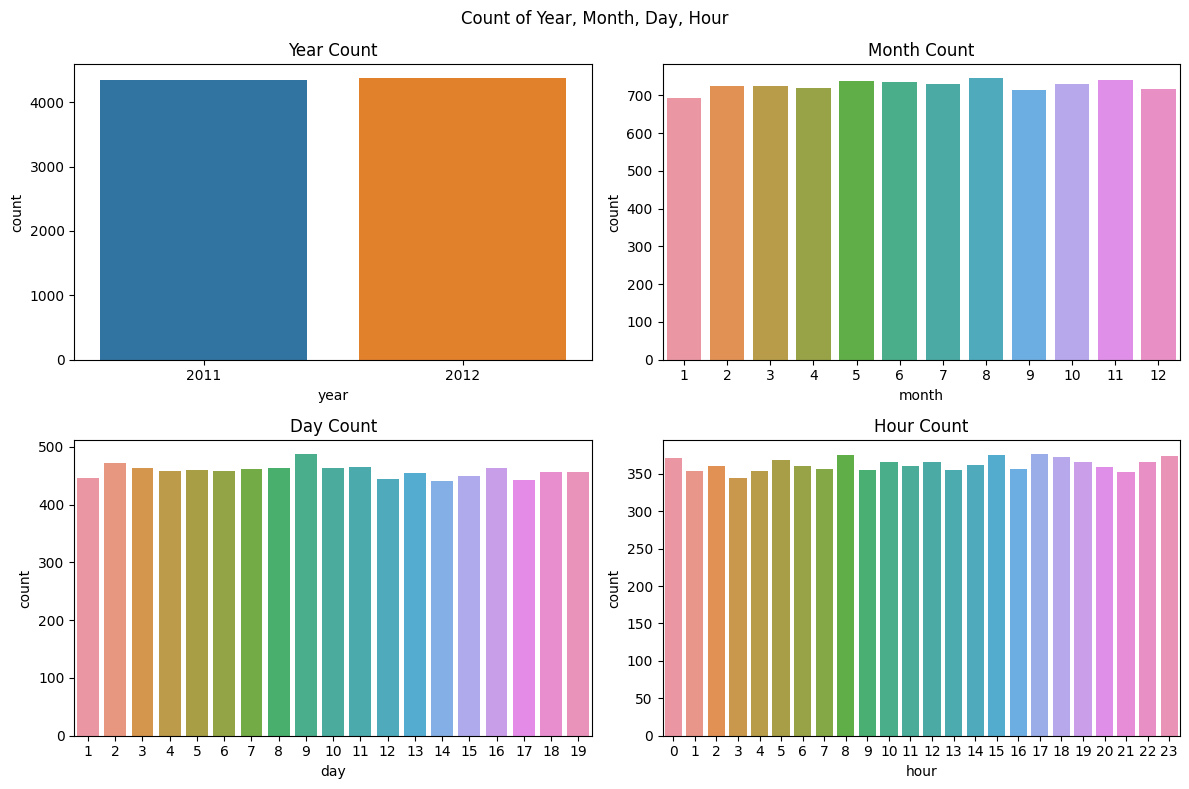

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 개수 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Year countplot
sns.countplot(data=train, x='year', ax=axes[0, 0])
axes[0, 0].set_title('Year Count')

# Month countplot
sns.countplot(data=train, x='month', ax=axes[0, 1])
axes[0, 1].set_title('Month Count')

# Day countplot
sns.countplot(data=train, x='day', ax=axes[1, 0])
axes[1, 0].set_title('Day Count')

# Hour countplot
sns.countplot(data=train, x='hour', ax=axes[1, 1])
axes[1, 1].set_title('Hour Count')

# 전체 그래프 제목
fig.suptitle('Count of Year, Month, Day, Hour')

plt.tight_layout()
plt.show()


## EDA & Feature Engineering

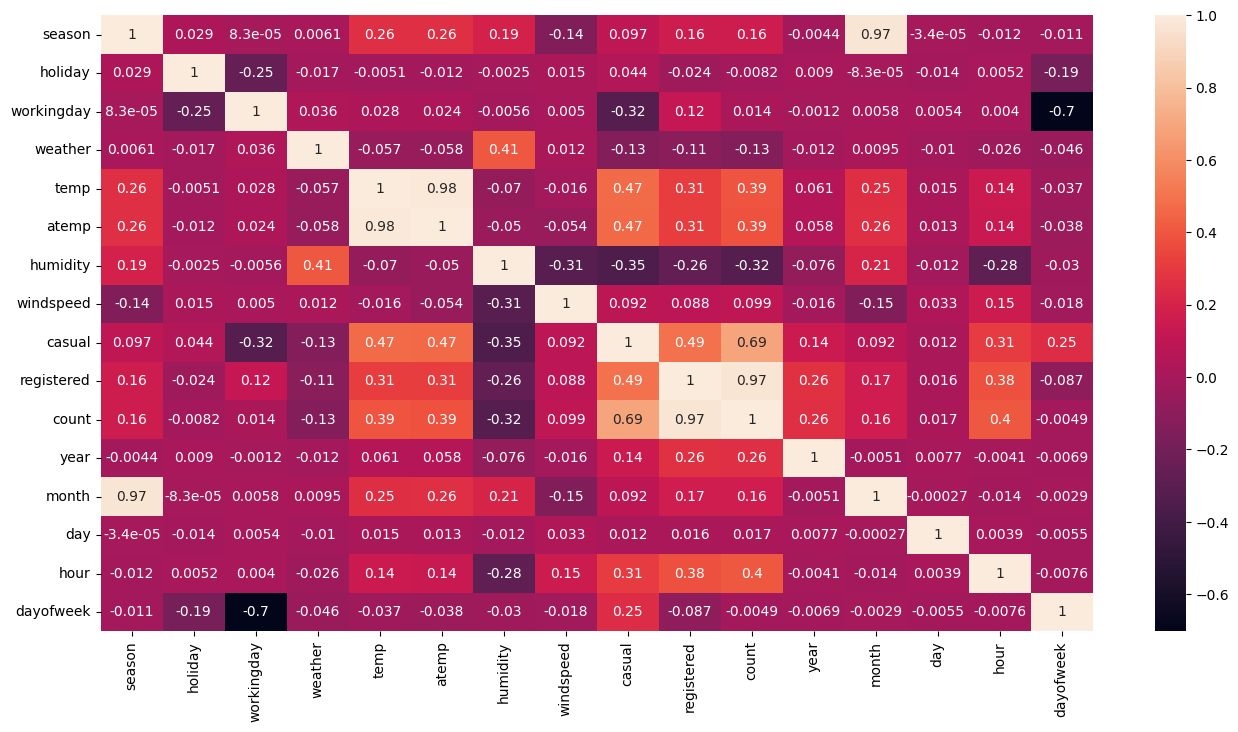

In [ ]:
#각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
# categorical data numeric data 로 변환

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['dayofweek'] = le.fit_transform(train['dayofweek'])
test['dayofweek'] = le.transform(test['dayofweek'])

## Outlier 처리

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    187.0000
count         242.0000
year            1.0000
month           6.0000
day            10.0000
hour           12.0000
dayofweek       4.0000
dtype: float64


In [ ]:
train_without_outliers =train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
train_without_outliers.dropna(inplace=True)

<ipython-input-17-9327b2dc4bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers.dropna(inplace=True)


In [ ]:
print(train.describe())
print('**************************************************')
print(train_without_outliers.describe())

            season      holiday   workingday      weather         temp  \
count  8708.000000  8708.000000  8708.000000  8708.000000  8708.000000   
mean      2.507694     0.029169     0.680983     1.416743    20.269104   
std       1.115295     0.168289     0.466122     0.634073     7.788428   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    20.500000   
75%       4.000000     0.000000     1.000000     2.000000    26.240000   
max       4.000000     1.000000     1.000000     4.000000    41.000000   

             atemp     humidity    windspeed       casual   registered  \
count  8708.000000  8708.000000  8708.000000  8708.000000  8708.000000   
mean     23.694257    61.811438    12.795542    35.995866   155.588884   
std       8.460347    19.288803     8.200255    49.858679   151.132186   
min       0.760000     0.000000     0

## "windspeed" Column Preprocessing

<Axes: xlabel='season', ylabel='windspeed'>

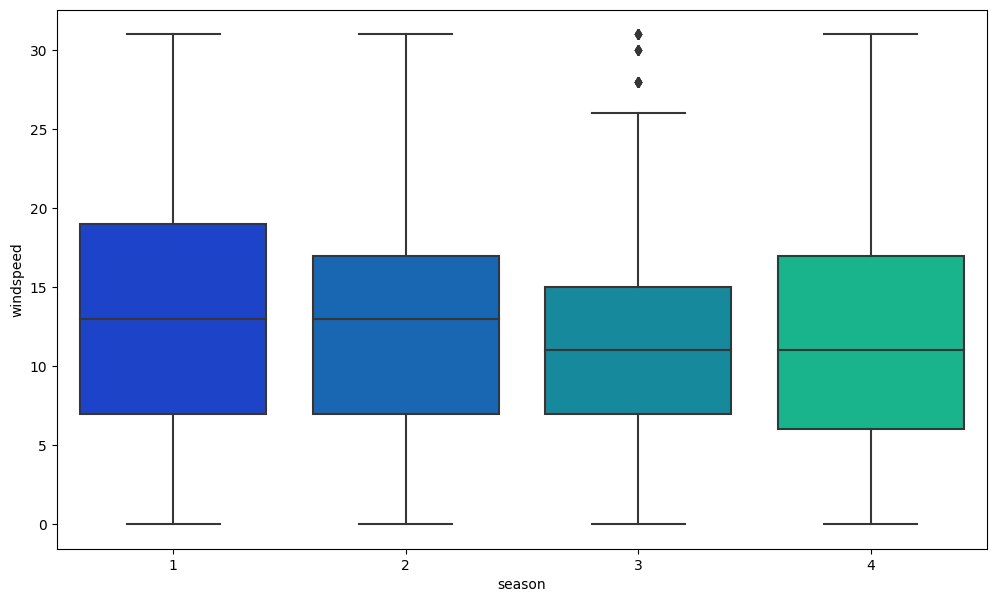

In [ ]:
"""
Windspeed 분포를 표현한 그래프에서 Windspeed가 0인 값들이 많았는데,
이는 실제로 0이었던지 or 값을 제대로 측정하지 못해서 0인지 두 개의 경우가 있다.
하지만 후자의 생각을 가지고 우리의 데이터를 활용하여 windspeed값을 부여하였다.
"""
plt.figure(figsize=(12, 7))
sns.boxplot(x='season',y='windspeed',data=train_without_outliers,palette='winter')

In [ ]:
# 일단 0인 부분을 NaN 으로 바꿔준다.
import numpy as np
train_without_outliers['windspeed'] = train_without_outliers['windspeed'].replace(0,np.NaN)
test['windspeed'] = test['windspeed'].replace(0,np.NaN)

#Nan 값을 interpolate 로 채우기 (Interpolate is using fill NaN value for time series data.)
train_without_outliers['windspeed'].fillna(method='bfill',inplace=True)
train_without_outliers['windspeed'] = train_without_outliers['windspeed'].interpolate()
test['windspeed'].fillna(method='bfill',inplace=True)
test['windspeed'] = test['windspeed'].interpolate()

<ipython-input-33-4a79bf48b6a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers['windspeed'] = train_without_outliers['windspeed'].replace(0,np.NaN)
<ipython-input-33-4a79bf48b6a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers['windspeed'].fillna(method='bfill',inplace=True)
<ipython-input-33-4a79bf48b6a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
print(train_without_outliers.isnull().sum())
(test.isnull().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dayofweek     0
dtype: int64


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dayofweek     0
dtype: int64

In [ ]:
# categorical data 를 categorical column 으로 변환
train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')
test[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = test[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')

<ipython-input-36-92e3664eac1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')


In [ ]:
train_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7407 entries, 2011-07-06 05:00:00 to 2012-05-02 07:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      7407 non-null   category
 1   holiday     7407 non-null   category
 2   workingday  7407 non-null   category
 3   weather     7407 non-null   category
 4   temp        7407 non-null   float64 
 5   atemp       7407 non-null   float64 
 6   humidity    7407 non-null   int64   
 7   windspeed   7407 non-null   float64 
 8   casual      7407 non-null   int64   
 9   registered  7407 non-null   int64   
 10  count       7407 non-null   int64   
 11  year        7407 non-null   category
 12  month       7407 non-null   category
 13  day         7407 non-null   category
 14  hour        7407 non-null   category
 15  dayofweek   7407 non-null   category
dtypes: category(9), float64(3), int64(4)
memory usage: 530.9 KB


# Training and Evaluation

In [ ]:
X_train = train_without_outliers[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']]
y_train = train_without_outliers['count']
X_test = test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']]
y_test = test['count']

In [ ]:
def rmse(y_pred, y_actual):
    mse = np.mean((y_pred - y_actual) ** 2)
    rmse = np.sqrt(mse)
    return rmse


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import itertools

# X_train과 X_test에서 사용할 칼럼 리스트
columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
           'humidity', 'year', 'month', 'day', 'hour', 'dayofweek', 'windspeed']

# 모든 칼럼 조합 생성
column_combinations = []
for r in range(6, len(columns) + 1):
    column_combinations.extend(list(itertools.combinations(columns, r)))

# 최적의 모델 및 파라미터 조합 초기화
best_model = None
best_combi = None
best_rmse = float('inf')

# GridSearchCV를 사용하여 최적의 모델 탐색
for cols in column_combinations:
    # X_train, X_test에서 해당 칼럼만 선택
    X_train_subset = X_train[list(cols)]
    X_test_subset = X_test[list(cols)]

    # 모델 훈련
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # 예측
    y_pred_subset = model.predict(X_test_subset)

    # RMSE 계산
    rmse_subset = rmse(y_pred_subset, y_test)

    # 현재 조합의 RMSE 값이 더 작으면 최적의 모델 및 파라미터 조합 업데이트
    if rmse_subset < best_rmse:
        best_rmse = rmse_subset
        best_model = model
        best_combi = cols

print("Best Model:", best_model)
print("Best Parameters:", best_combi)
print("Best RMSE:", best_rmse)


Best Model: LinearRegression()
Best Parameters: ('season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month', 'day', 'hour', 'windspeed')
Best RMSE: 149.49028448585295


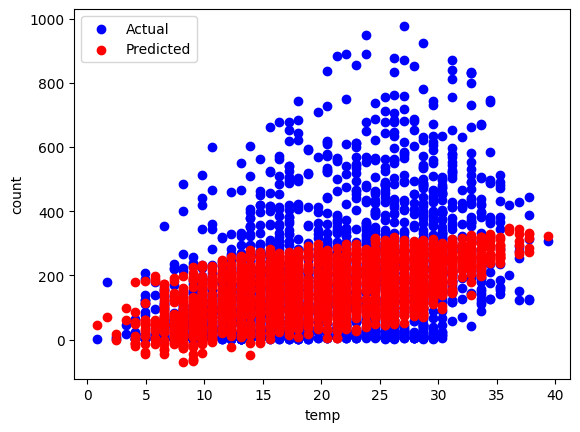

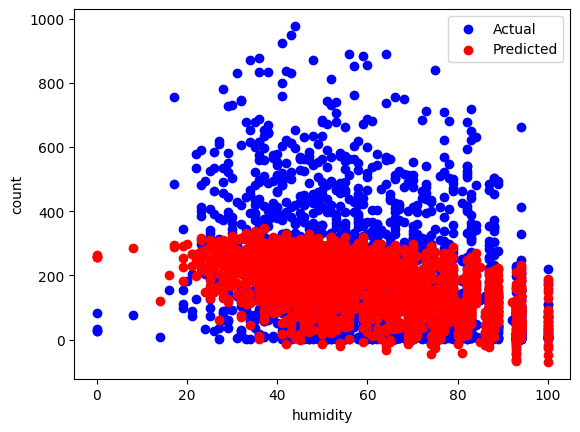

In [ ]:
import matplotlib.pyplot as plt

# 최적 모델의 예측값 계산
y_pred_best = best_model.predict(X_test[list(best_combi)])

# temp에 대한 시각화
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual')
plt.scatter(X_test['temp'], y_pred_best, color='red', label='Predicted')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

# humidity에 대한 시각화
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual')
plt.scatter(X_test['humidity'], y_pred_best, color='red', label='Predicted')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()
